**Assignment 3**
Zehao Peng

Question 1

In [34]:
from utils import ziterations
import numpy as np
import matplotlib.pyplot as plt

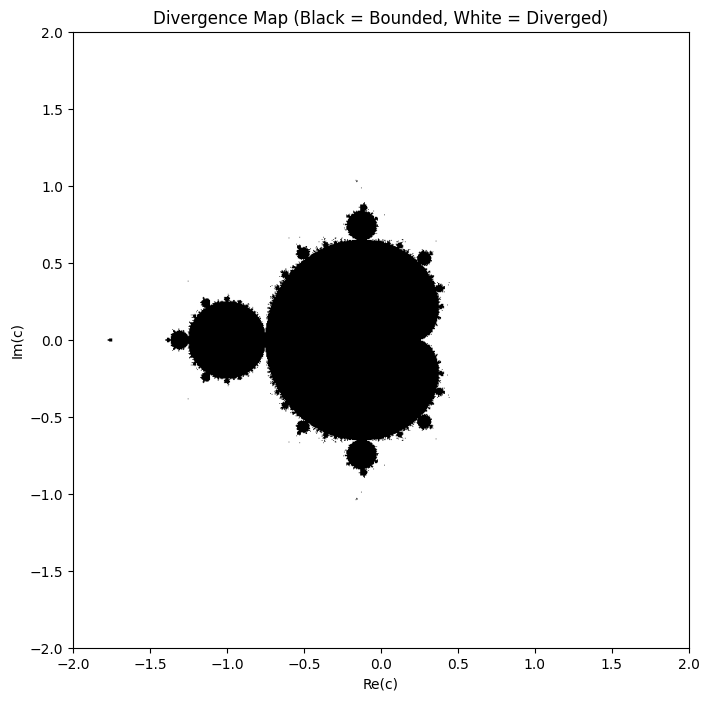

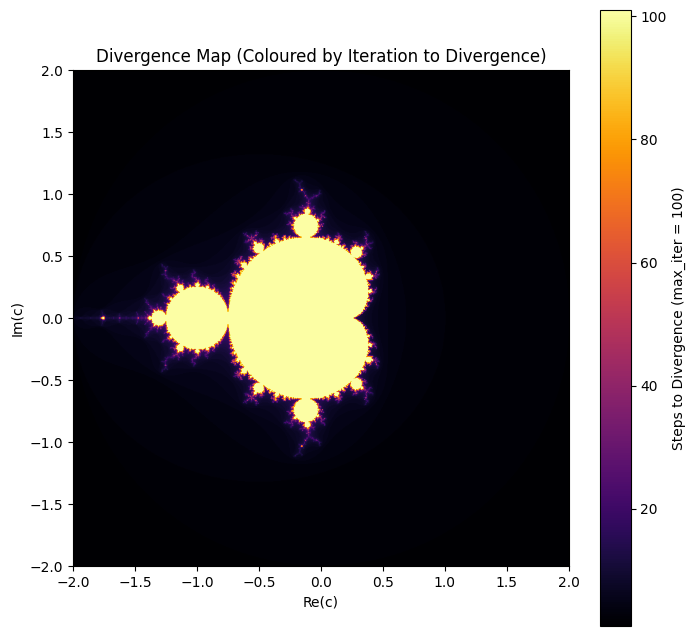

In [35]:
width, height = 800, 800
x_min, x_max = -2, 2
y_min, y_max = -2, 2
# the complex plane for x in (-2,2) and y in (-2,2)
max_iter = 100

x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
divergence_flag = np.zeros((height, width))
divergence_step = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        c = X[i, j] + 1j * Y[i, j]
        diverged, step = ziterations(c, max_iter)
        # running the iteration function on every point
        divergence_flag[i, j] = diverged
        divergence_step[i, j] = step

# Boolean divergence
plt.figure(figsize=(8, 8))
plt.imshow(divergence_flag, cmap='gray', extent=(x_min, x_max, y_min, y_max))
plt.title('Divergence Map (Black = Bounded, White = Diverged)')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.savefig('divergence_map.pdf', dpi=300)
plt.show()

# Divergence map
plt.figure(figsize=(8, 8))
plt.imshow(divergence_step, cmap='inferno', extent=(x_min, x_max, y_min, y_max))
plt.title(f'Divergence Map (Coloured by Iteration to Divergence)')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label=f'Steps to Divergence (max_iter = {max_iter})')
plt.savefig('divergence_steps.pdf', dpi=300)
plt.show()


Question 2
1. The code for lorenz() is contained in utils.py.
2. Here, solve_ivp will be used.
3. Please see code block below.

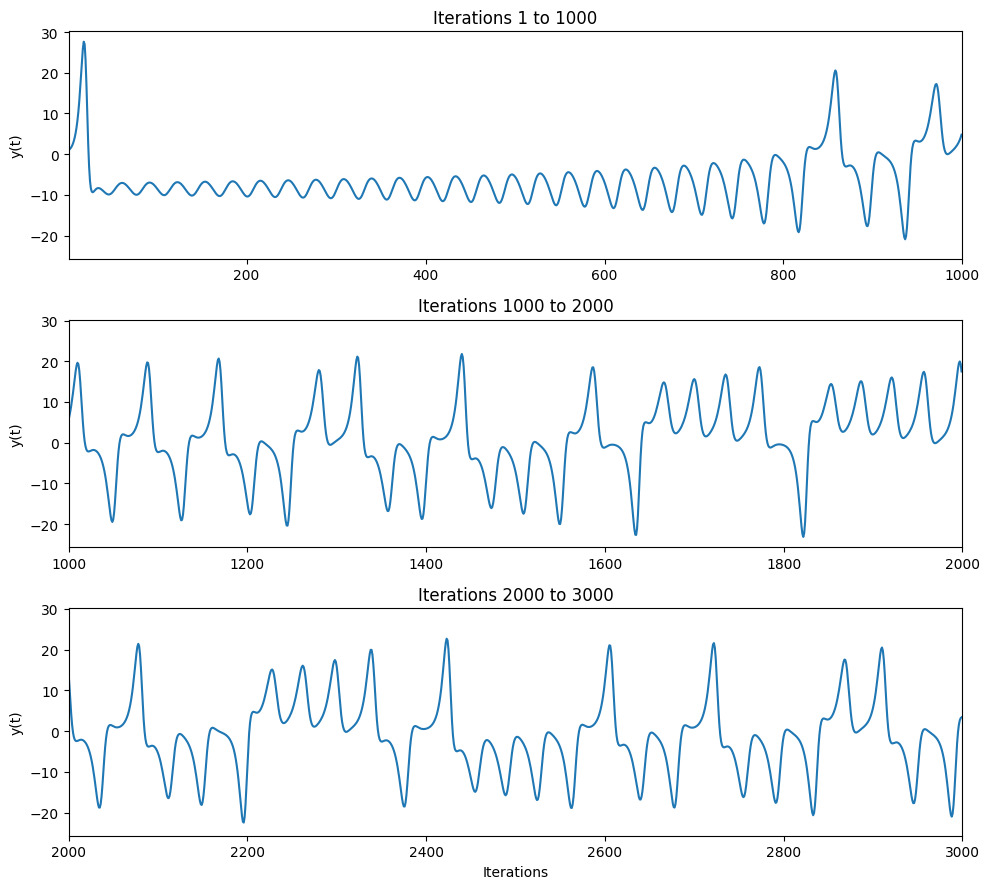

In [36]:
from scipy.integrate import solve_ivp
from utils import lorenz

W0 = [0., 1., 0.]
t_span = (0, 60)
t_eval = np.linspace(t_span[0], t_span[1], 3000)

# Solve the system
sol = solve_ivp(lorenz, t_span, W0, t_eval=t_eval)
x, y, z = sol.y
t = sol.t

fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharey=True)

# Lorentz separates his plot into 3 segments for easy viewing. I will do the same.
# Plot 1: x from 1 to 1000
axs[0].plot(y[:1000])
axs[0].set_title('Iterations 1 to 1000')
axs[0].set_xlim(1, 1000)

# Plot 2: x from 1000 to 2000
axs[1].plot(range(1000, 2000), y[1000:2000])
axs[1].set_title('Iterations 1000 to 2000')
axs[1].set_xlim(1000, 2000)

# Plot 3: x from 2000 to 3000
axs[2].plot(range(2000, 3000), y[2000:3000])
axs[2].set_title('Iterations 2000 to 3000')
axs[2].set_xlim(2000, 3000)

axs[2].set_xlabel('Iterations')
axs[0].set_ylabel('y(t)')
axs[1].set_ylabel('y(t)')
axs[2].set_ylabel('y(t)')
plt.tight_layout()
plt.savefig('lorentz_y.pdf', dpi=300)
plt.show()

4. Please see code block below.

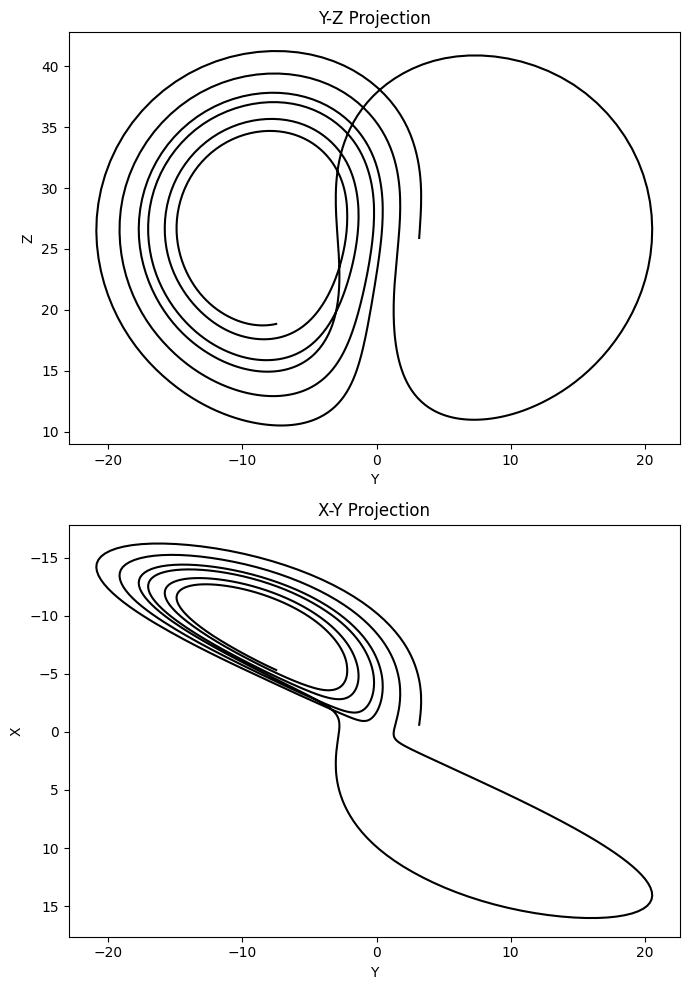

In [37]:
# New time span and evaluation points between t = 14 and t = 19
t_fine = np.linspace(14, 19, 1000)
sol_fine = solve_ivp(lorenz, (0, 60), W0, dense_output=True)

W_fine = sol_fine.sol(t_fine)
x_fine, y_fine, z_fine = W_fine

dt = 0.01


fig, axs = plt.subplots(2, 1, figsize=(7, 10))

# Y-Z projection
axs[0].plot(y_fine, z_fine, color='black')
axs[0].set_xlabel("Y")
axs[0].set_ylabel("Z")
axs[0].set_title("Y-Z Projection")

# X-Y projection
axs[1].plot(y_fine, x_fine, color='black')
axs[1].set_xlabel("Y")
axs[1].set_ylabel("X")
axs[1].invert_yaxis() # Lorentz's plots are inverted for some reaosn
# This is just to make it look like the original plot
axs[1].set_title("X-Y Projection")

plt.tight_layout()
plt.savefig('lorentz_projections.pdf', dpi=300)
plt.show()

4. Please see code block below.

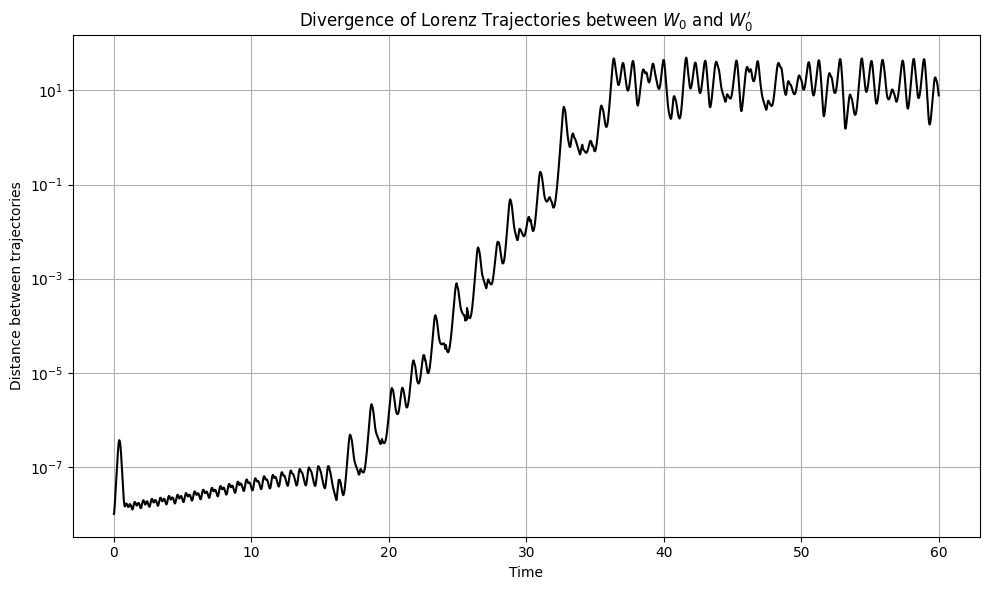

In [38]:
W0_prime = [0., 1.00000001, 0.] # I am going to just hard code this


sol_prime = solve_ivp(lorenz, t_span, W0_prime, t_eval=t_eval)
delta = np.linalg.norm(sol.y - sol_prime.y, axis=0) # Euclidean distance

plt.figure(figsize=(10, 6))
plt.semilogy(sol.t, delta, 'k-')
plt.xlabel("Time")
plt.ylabel("Distance between trajectories")
plt.title("Divergence of Lorenz Trajectories between $W_0$ and $W_0'$")
plt.grid(True)
plt.tight_layout()
plt.savefig('lorentz_divergence.pdf', dpi=300)
plt.show()